In [1]:
import pandas as pd
import matplotlib.pyplot as py_plt
import seaborn as sb

In [2]:
#set figure and style for visualisation
sb.set(rc={'figure.figsize':(25,15)},style='white')

In [3]:
#upload appoinment regional file and view first 5 rows
df=pd.read_csv("appointments_regional.csv")
df.tail(5)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17
596820,E54000050,2022-06,Unknown,Unknown,Unknown,Same Day,10


In [4]:
#prnt max date
df.max()

icb_ons_code                                      E54000062
appointment_month                                   2022-06
appointment_status                                  Unknown
hcp_type                                            Unknown
appointment_mode                               Video/Online
time_between_book_and_appointment    Unknown / Data Quality
count_of_appointments                                211265
dtype: object

In [5]:
#print min date
df.min()

icb_ons_code                            E54000008
appointment_month                         2020-01
appointment_status                       Attended
hcp_type                                       GP
appointment_mode                     Face-to-Face
time_between_book_and_appointment           1 Day
count_of_appointments                           1
dtype: object

In [4]:
#Filter data from 2021-08 and view DataFrame
new_df=df[df['appointment_month']>="2021-08"]
new_df

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [11]:
# create DataFrame and set as ar_agg and view different features
ar_agg=new_df[['appointment_month','hcp_type','appointment_status','appointment_mode','time_between_book_and_appointment']]
ar_agg.groupby(['appointment_month','hcp_type','appointment_status','appointment_mode','time_between_book_and_appointment']).sum().reset_index()
ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment
3652,2021-08,GP,Attended,Face-to-Face,1 Day
3653,2021-08,GP,Attended,Face-to-Face,15 to 21 Days
3654,2021-08,GP,Attended,Face-to-Face,2 to 7 Days
3655,2021-08,GP,Attended,Face-to-Face,22 to 28 Days
3656,2021-08,GP,Attended,Face-to-Face,8 to 14 Days
...,...,...,...,...,...
596816,2022-06,Unknown,Unknown,Unknown,2 to 7 Days
596817,2022-06,Unknown,Unknown,Unknown,22 to 28 Days
596818,2022-06,Unknown,Unknown,Unknown,8 to 14 Days
596819,2022-06,Unknown,Unknown,Unknown,More than 28 Days


In [14]:
#create new DataFrame and determine average utilisation of services
ar_df=df.groupby('appointment_month').sum().reset_index()
ar_df['utilisation']=ar_df.apply(lambda r:round((r.count_of_appointments)/30,1),axis=1)
ar_df

,appointment_month,count_of_appointments,utilisation
0,2020-01,27199296,906643.2
1,2020-02,24104621,803487.4
2,2020-03,24053468,801782.3
3,2020-04,16007881,533596.0
4,2020-05,16417212,547240.4
5,2020-06,20690805,689693.5
6,2020-07,22491437,749714.6
7,2020-08,20150520,671684.0
8,2020-09,26714255,890475.2
9,2020-10,28301932,943397.7


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

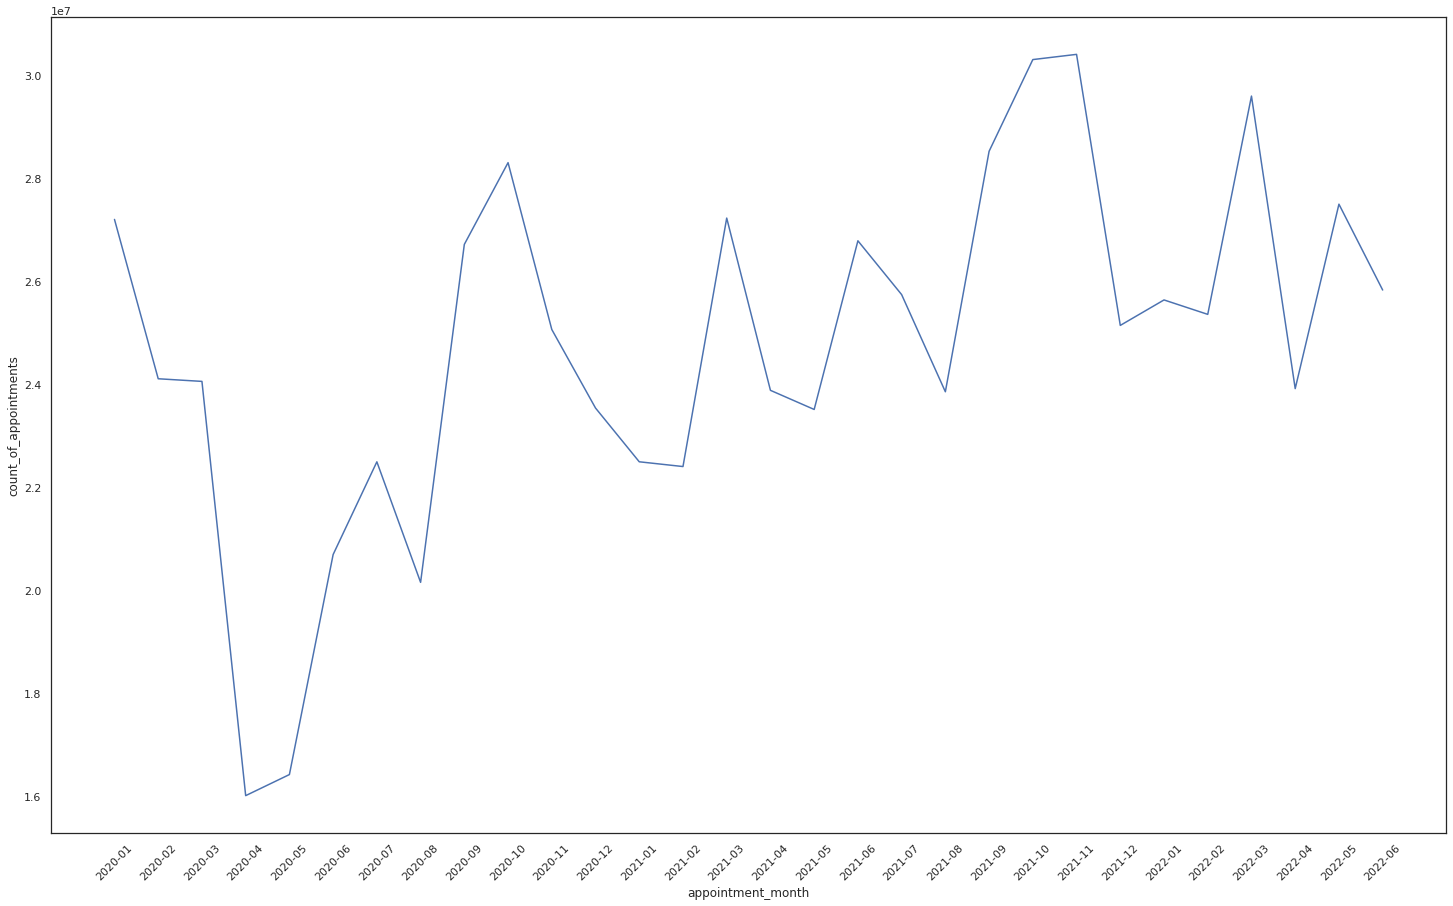

In [15]:
#Create a lineplot indicating the number of monthly visits
ar_df['appointment_month'].astype(str)
sb.lineplot(x=ar_df['appointment_month'],y=ar_df['count_of_appointments'])
py_plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

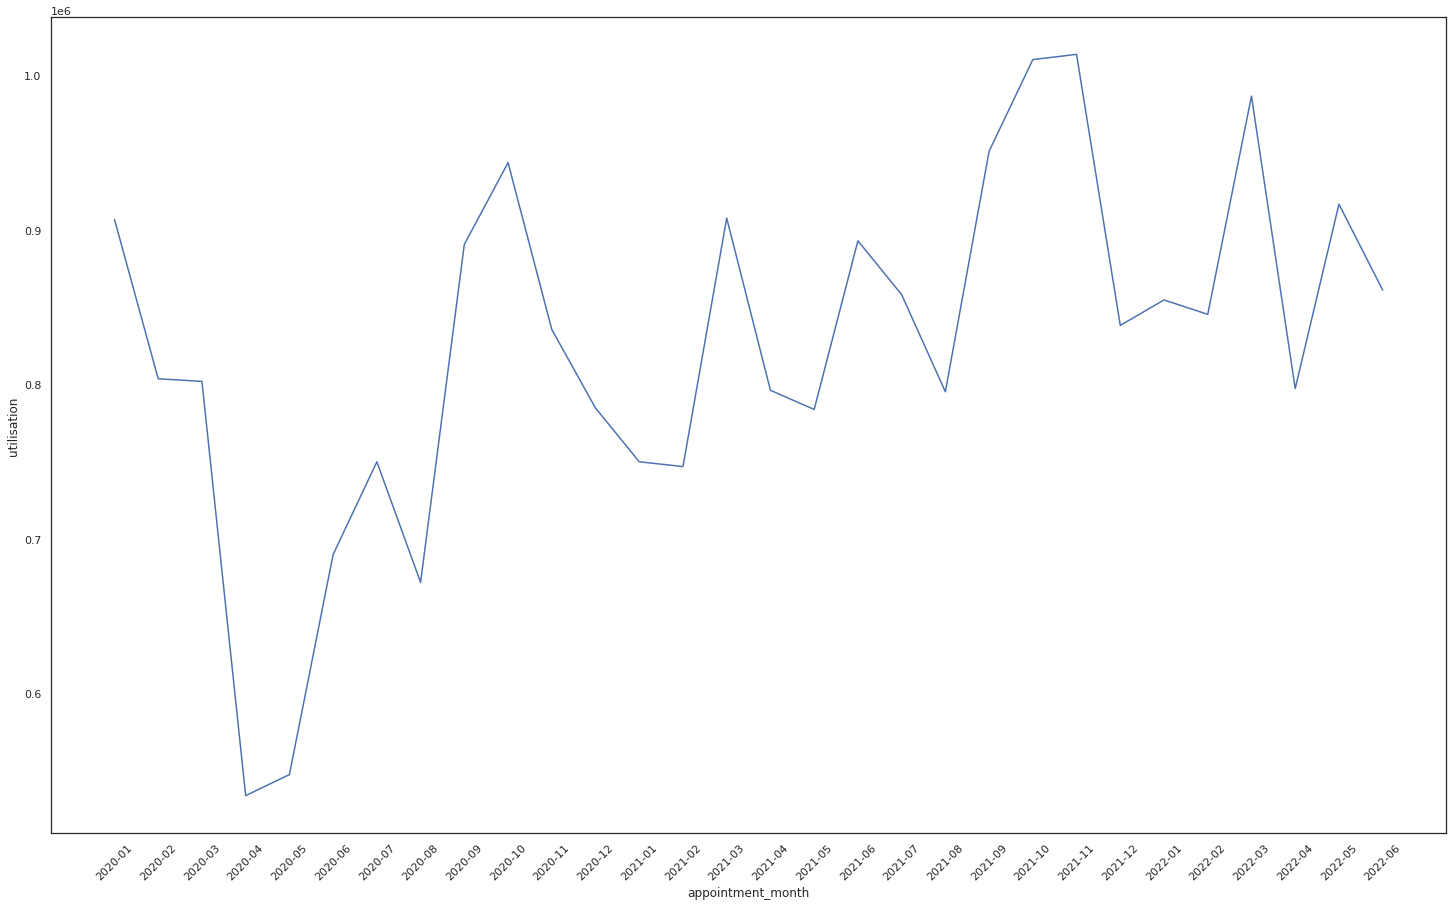

In [16]:
#Create a lineplot indicating the monthly capacity utilisation
sb.lineplot(x=ar_df['appointment_month'],y=ar_df['utilisation'])
py_plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

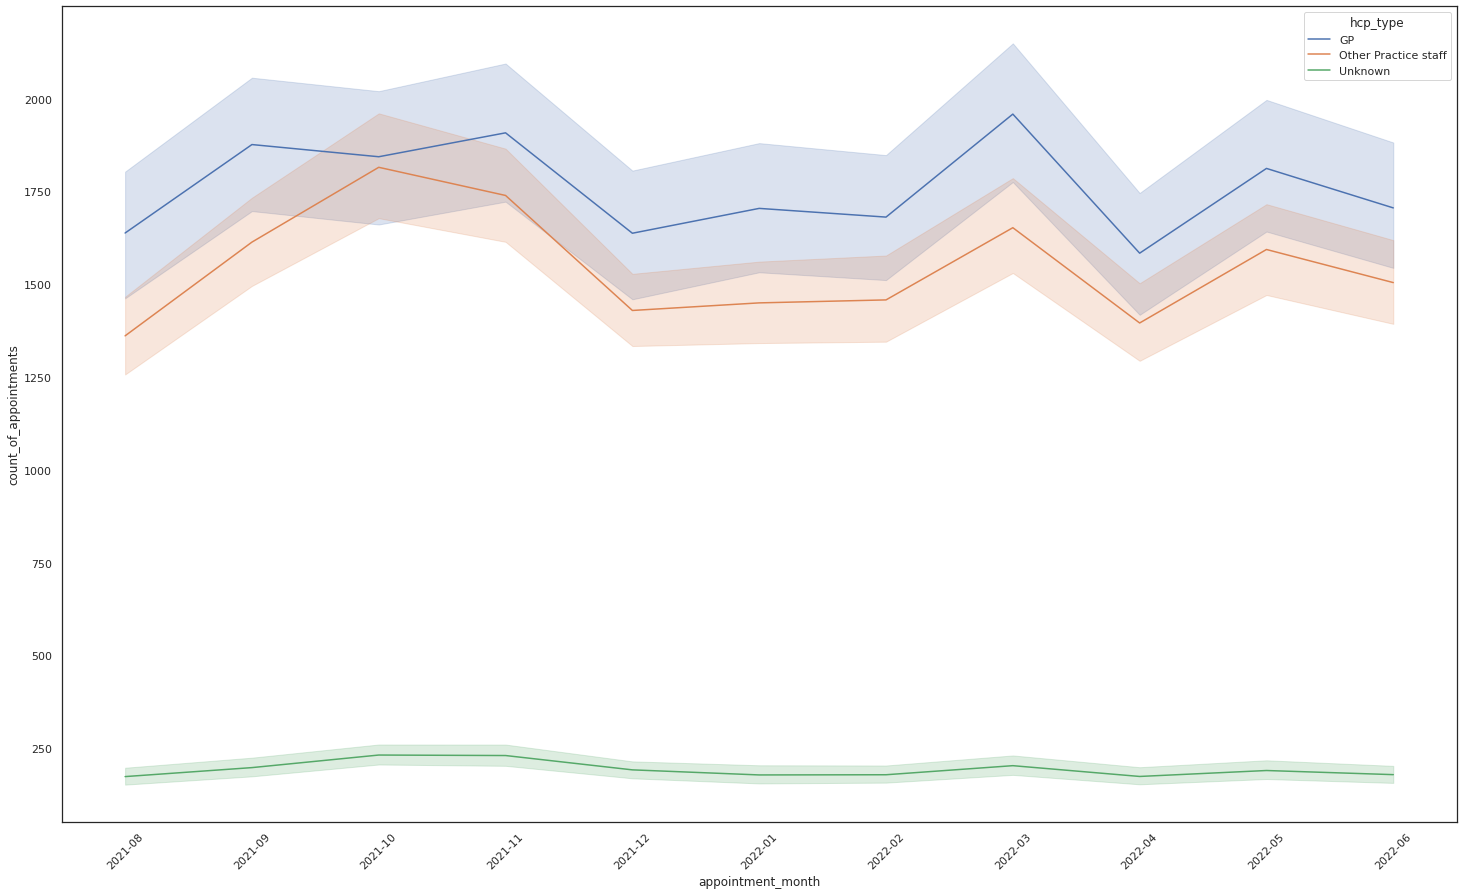

In [19]:
#Hvisualisation of how healthcare professional types differ over time
df=new_df
sb.lineplot(x=df['appointment_month'],y=df['count_of_appointments'],data=df,hue=df['hcp_type'])
py_plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

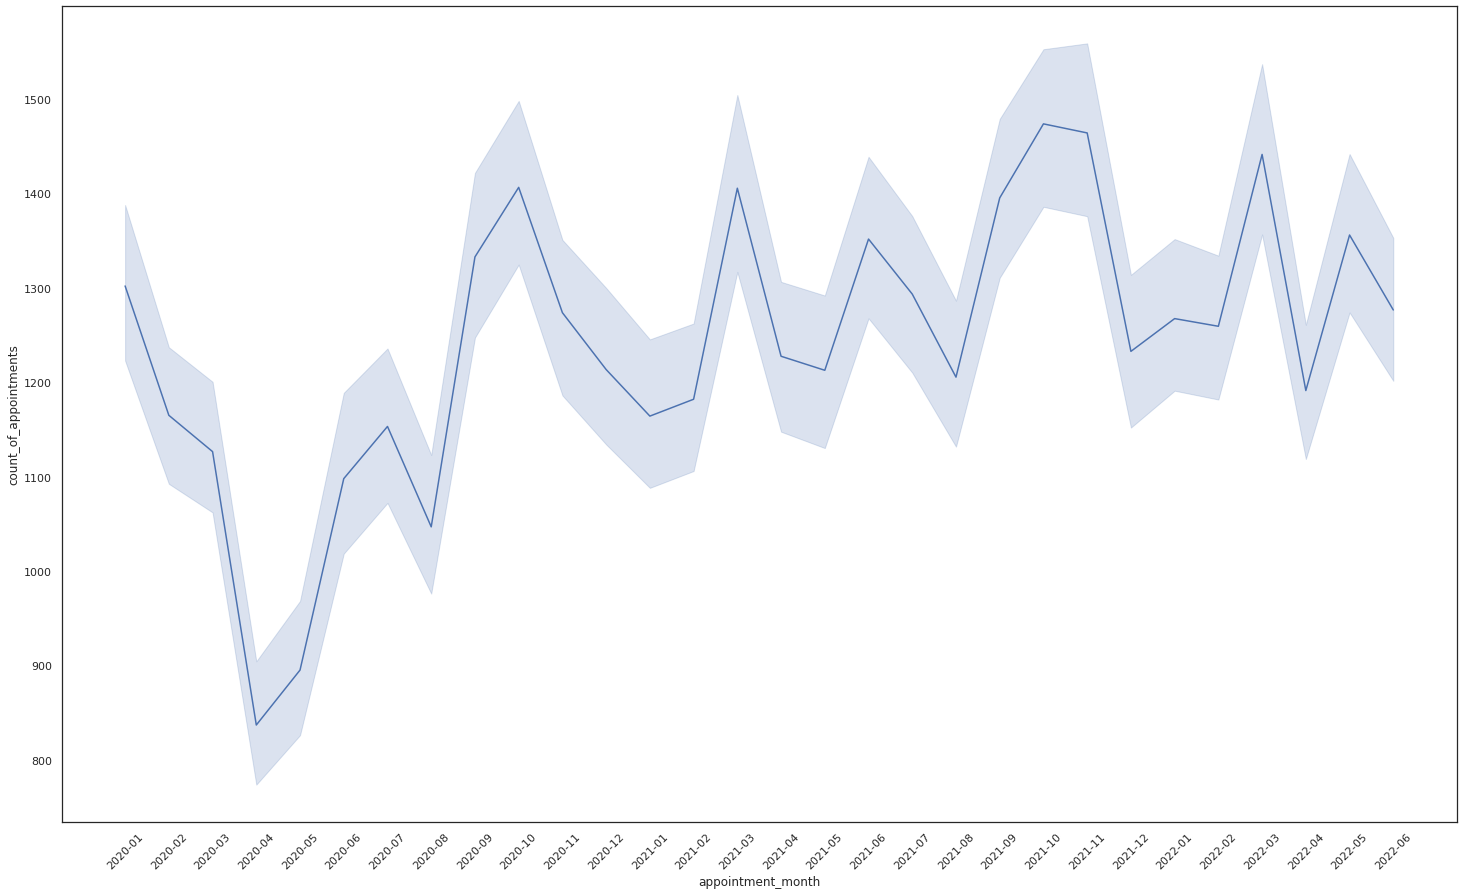

In [112]:
# visualisation for counts of appoinment
sb.lineplot(x=df['appointment_month'],y=df['count_of_appointments'])
py_plt.xticks(rotation=45)

<AxesSubplot:xlabel='appointment_mode', ylabel='count_of_appointments'>

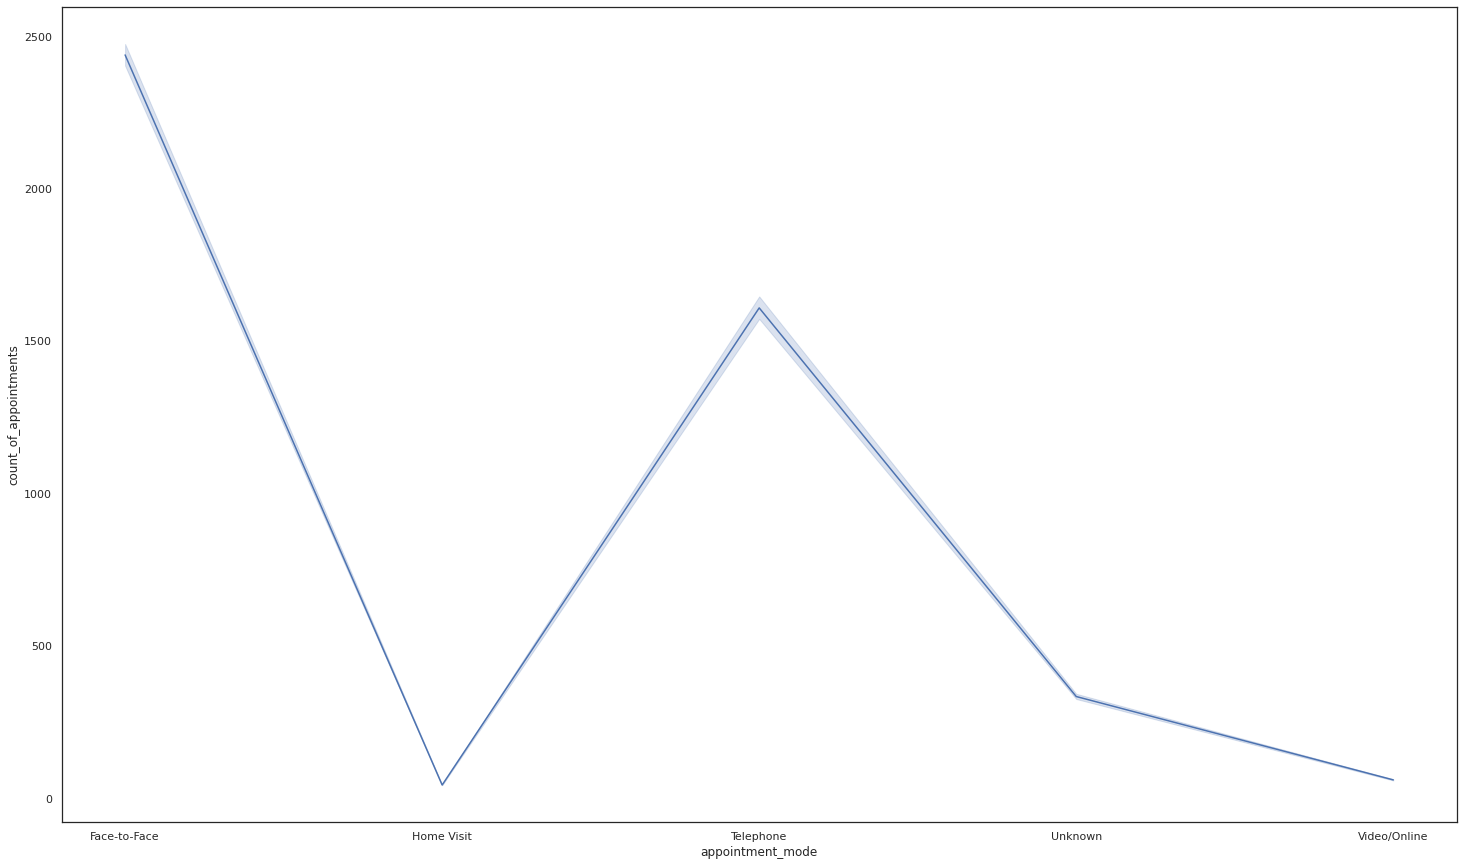

In [17]:
#visualisation for number of visits based on appoinment type
sb.lineplot(x=df['appointment_mode'],y=df['count_of_appointments'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

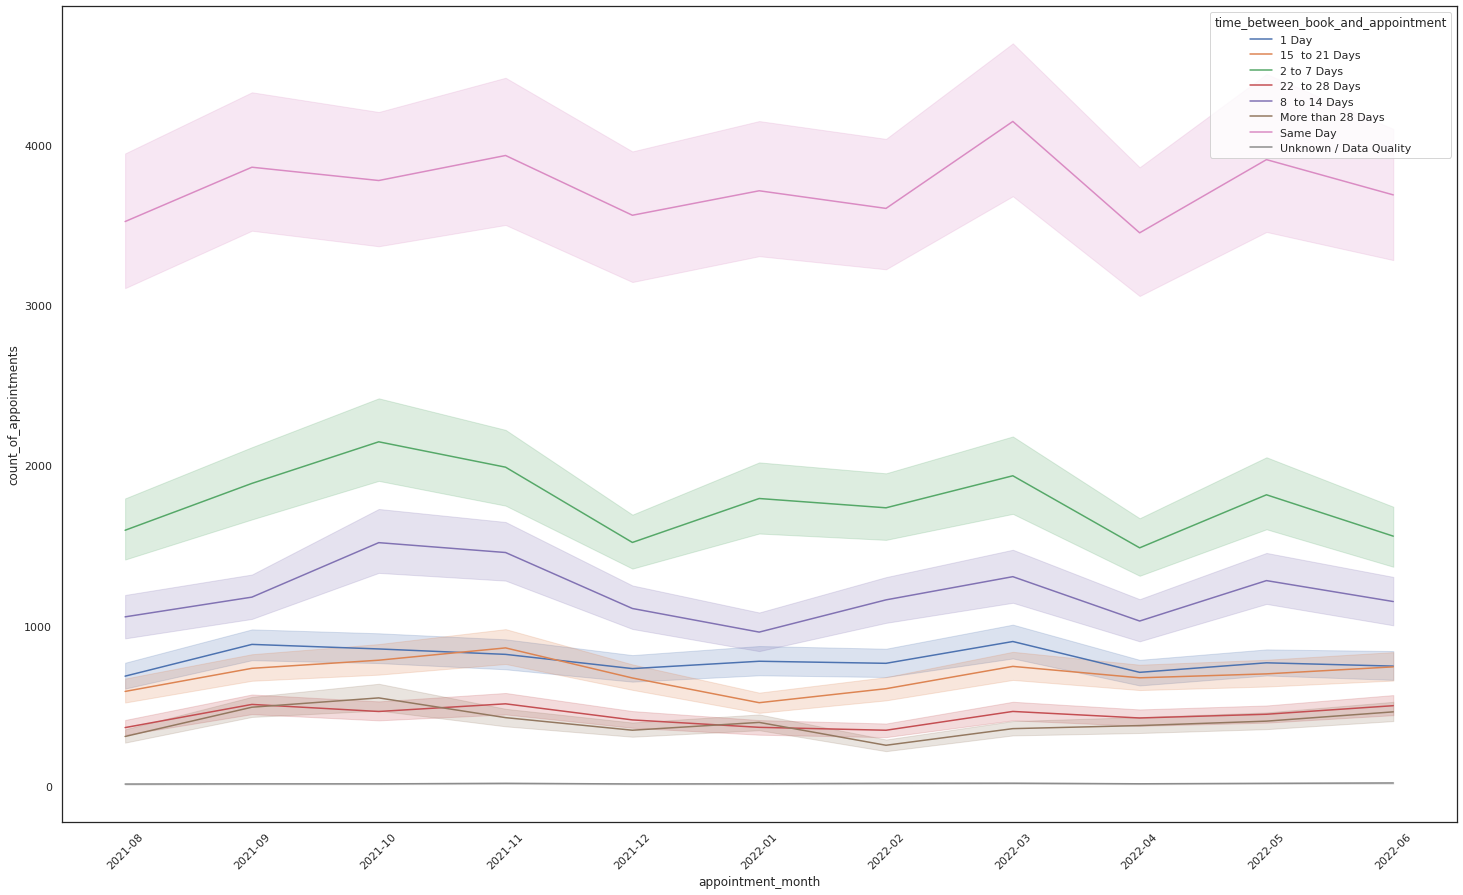

In [23]:
#visualisations of between booking book and appointment

sb.lineplot(x=df['appointment_month'],y=df['count_of_appointments'],hue=df['time_between_book_and_appointment'])
py_plt.xticks(rotation=45)

In [16]:
# read national catergories csv file 
df=pd.read_csv('national_categories.csv')
df

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,8/2/2021,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,8/2/2021,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,8/2/2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,8/2/2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,8/2/2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,6/30/2022,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,6/30/2022,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,6/30/2022,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,6/30/2022,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [17]:
g_b=df.groupby(['appointment_month','count_of_appointments'],group_keys=False).apply(lambda x:x)
g_b

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,8/2/2021,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,8/2/2021,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,8/2/2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,8/2/2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,8/2/2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,6/30/2022,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,6/30/2022,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,6/30/2022,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,6/30/2022,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


<AxesSubplot:xlabel='service_setting', ylabel='count_of_appointments'>

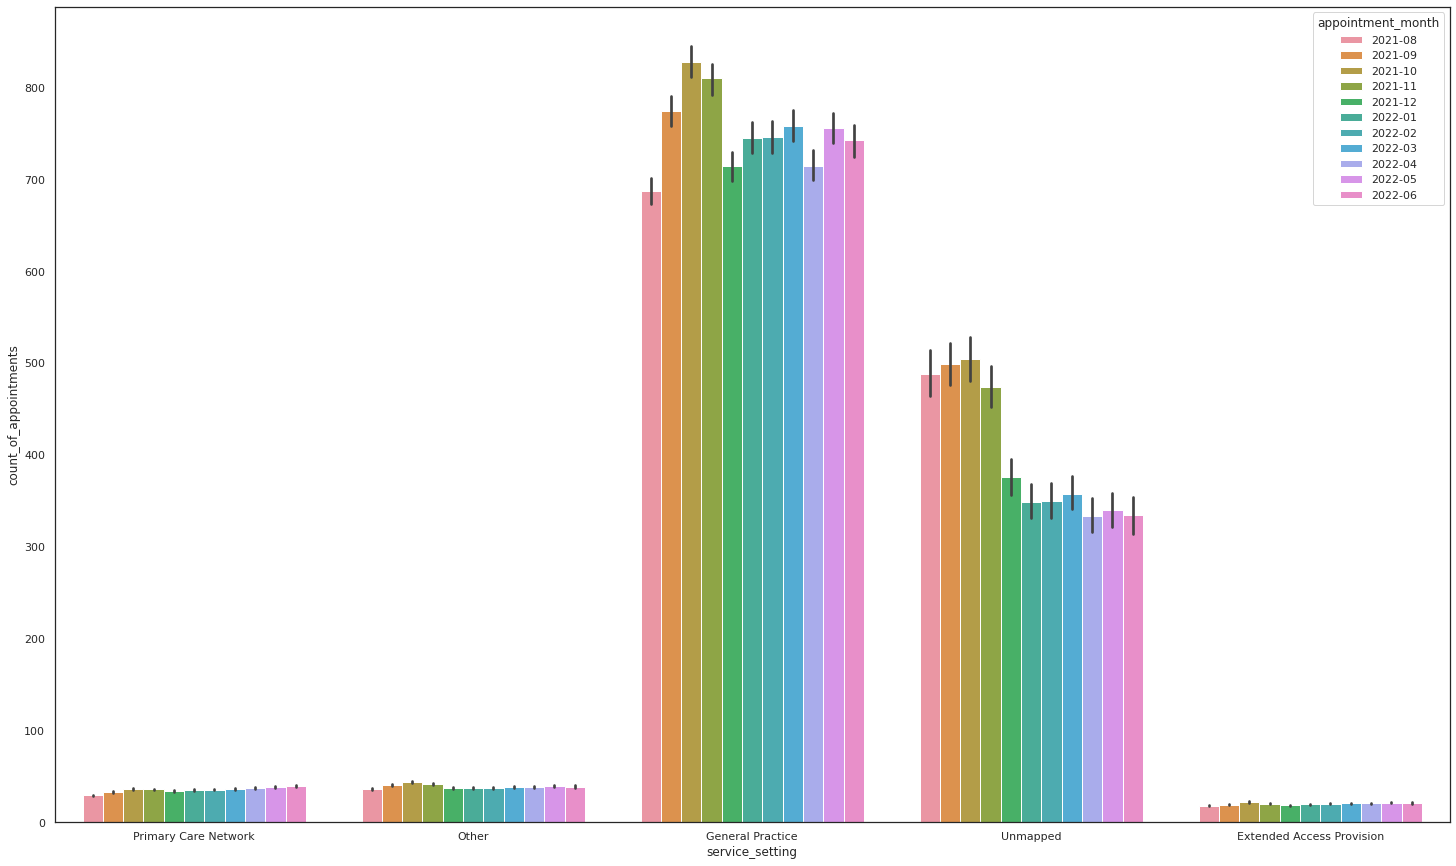

In [18]:
#visualisations of various service settings
sb.barplot(x='service_setting',y='count_of_appointments',data=g_b,hue='appointment_month')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Primary Care Network'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Unmapped'),
  Text(3, 0, 'Extended Access Provision')])

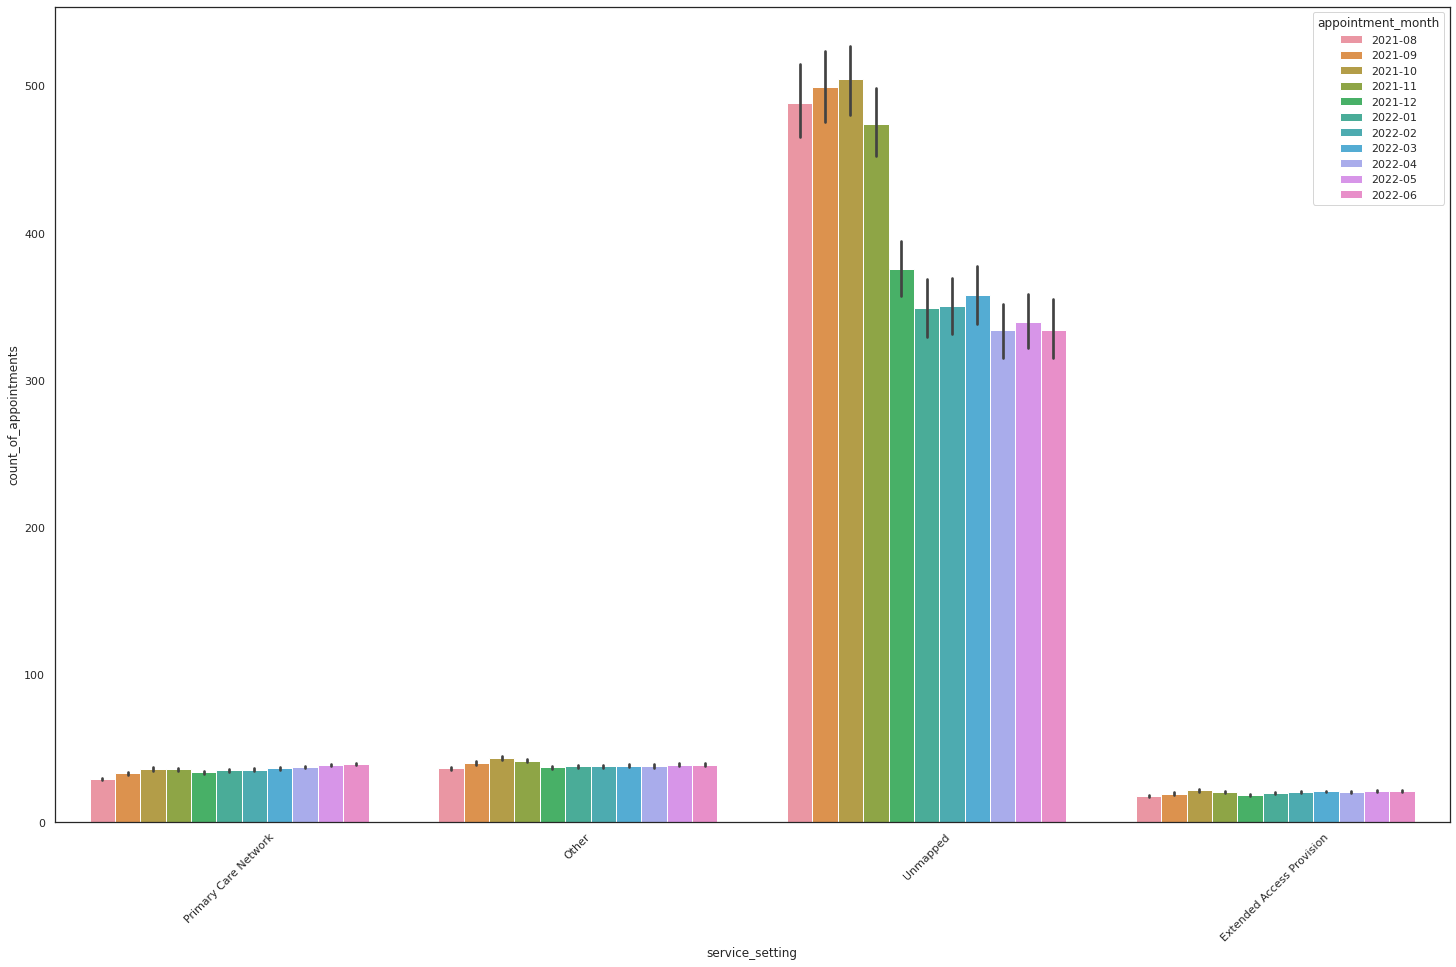

In [10]:
#visualisations of various service settings excluding gp 
sb.barplot(x='service_setting',y='count_of_appointments',data=df,hue='appointment_month')
py_plt.xticks(rotation=45)